In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:

# Assuming your DataFrame is named 'df'
# Before conversion
# Map 'Male' to 1 and 'Female' to 0
gender_mapping = {'Male': 1, 'Female': 0}
df['Genre'] = df['Genre'].map(gender_mapping)


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
# droping Id column
df.drop("CustomerID",axis=1,inplace=True)


In [9]:
# Checking Dataset
df


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [10]:
#Find missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# describtion of dataset
df.describe()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [12]:
# info about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [13]:
#no. of classes in Dataset
df.nunique()


Genre                      2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [14]:
#Correlation among dataset
# Assuming 'Gender' is the non-numeric column, you can remove it
# Assuming 'Gender' is a categorical variable
df.corr()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


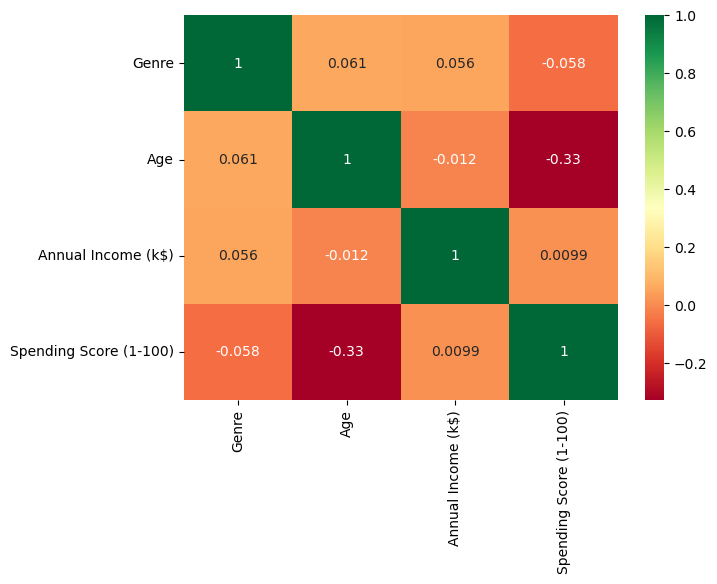

In [15]:
#Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()


array([[<Axes: title={'center': 'Genre'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

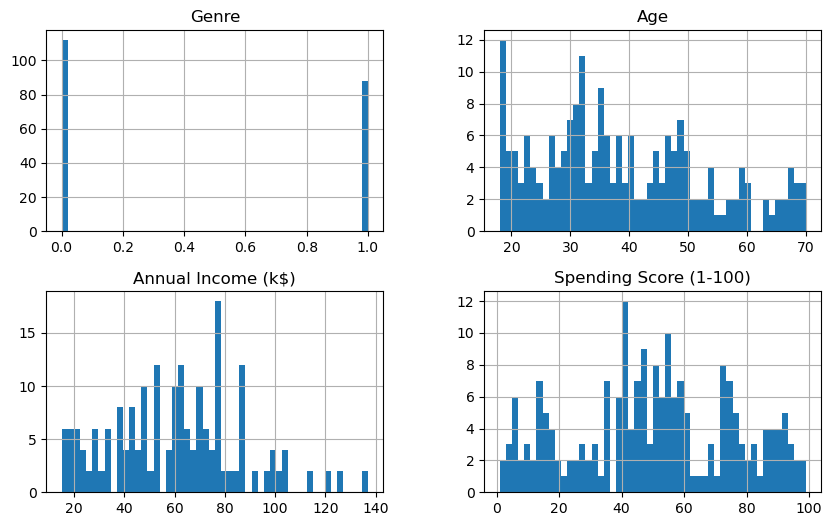

In [16]:
df.hist(bins = 50,figsize = (10,6))

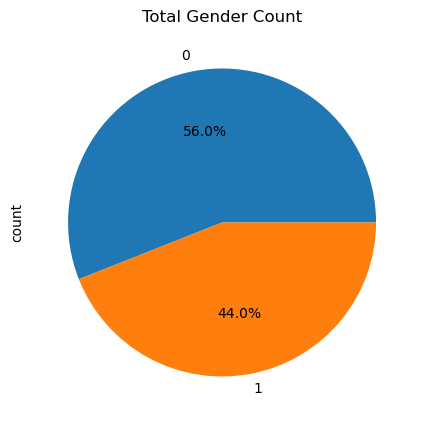

In [17]:
# pie chart for "Total Gender Count"
df['Genre'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Total Gender Count")
plt.show()


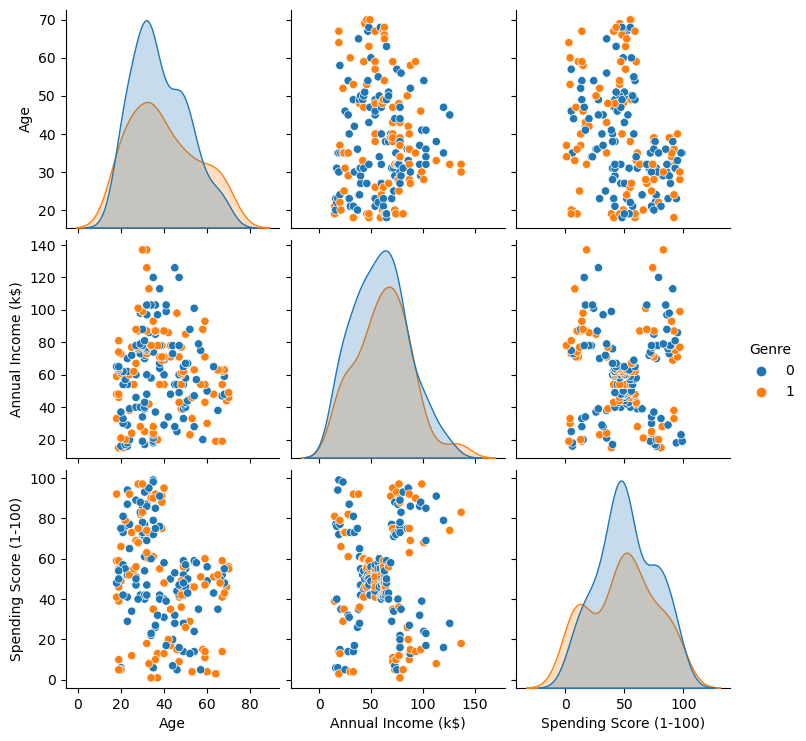

In [18]:
sns.pairplot(df,hue="Genre");

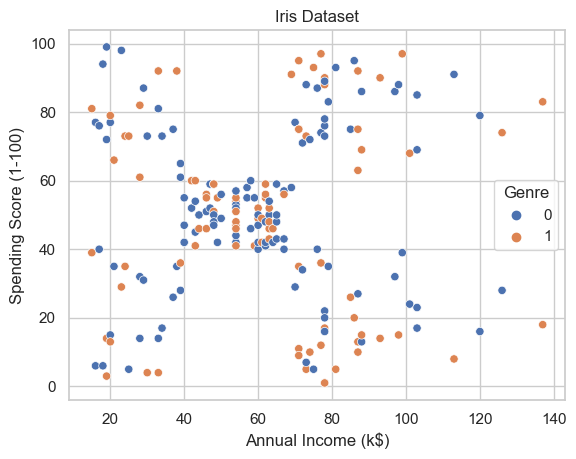

In [19]:
sns.set(style = 'whitegrid')
sns.scatterplot(y = 'Spending Score (1-100)',x ='Annual Income (k$)',data = df,hue= "Genre");
plt.title('Iris Dataset')
plt.show()


In [20]:
# LabelEncoder for encoding binary categories in a column
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
le = LabelEncoder()  
# One single vector so it is ovbious what we want to encode
df["Genre"] = le.fit_transform(df["Genre"])


In [21]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [22]:
# Finding the optimum number of clusters using k-means
data = df.copy()
x = data.iloc[:,[2,3]]

#importing Kmean model
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    # appending the WCSS to the list 
    #(kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"-> wcss:",kmeans.inertia_)


k: 1 -> wcss: 269981.28
k: 2 -> wcss: 181363.595959596
k: 3 -> wcss: 106348.37306211118
k: 4 -> wcss: 73679.78903948836
k: 5 -> wcss: 44448.45544793371
k: 6 -> wcss: 37233.81451071001
k: 7 -> wcss: 30241.34361793659
k: 8 -> wcss: 25036.417604033984
k: 9 -> wcss: 21916.794789843727
k: 10 -> wcss: 20072.070939404006


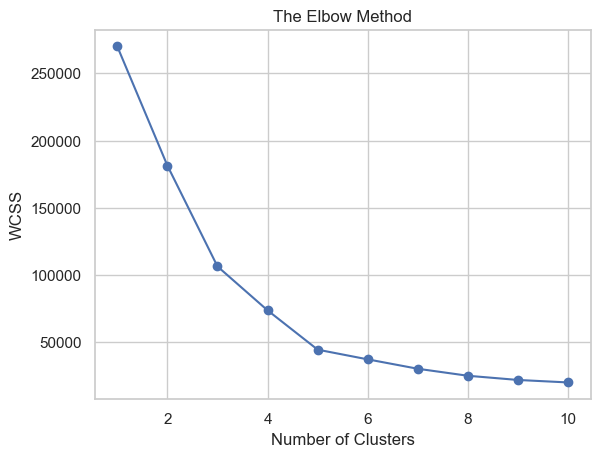

In [23]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(data)
#predicting the labels of the input data
y=km1.predict(data)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1


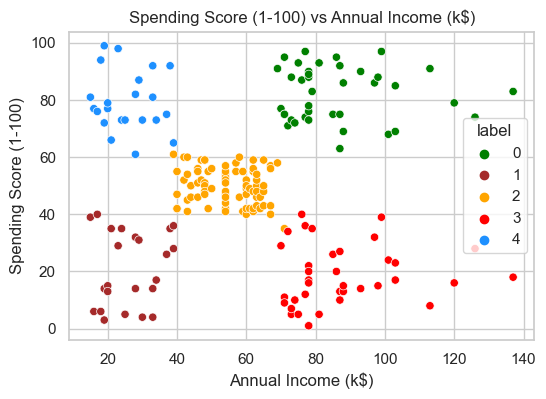

In [25]:
#Scatterplot of the clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','brown','orange','red','dodgerblue'],data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [26]:
X=data.iloc[:,:4]
y=data.iloc[:,-1]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)



(160, 4) (160,)
(40, 4) (40,)


In [28]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(X_train)
#predicting the target value from the model for the samples
y_train_km = km.predict(X_train)
y_test_km = km.predict(X_test)


In [29]:
from sklearn.metrics.cluster import adjusted_rand_score

acc_train_gmm = adjusted_rand_score(y_train,y_train_km)
acc_test_gmm = adjusted_rand_score(y_test,y_test_km)

print("K mean : Accuracy on training Data: {:.3f}".format(acc_train_gmm))
print("K mean : Accuracy on test Data: {:.3f}".format(acc_test_gmm))


K mean : Accuracy on training Data: 0.931
K mean : Accuracy on test Data: 0.912


In [30]:
data = df.copy()
data = data.iloc[:,[2,3]]
data


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


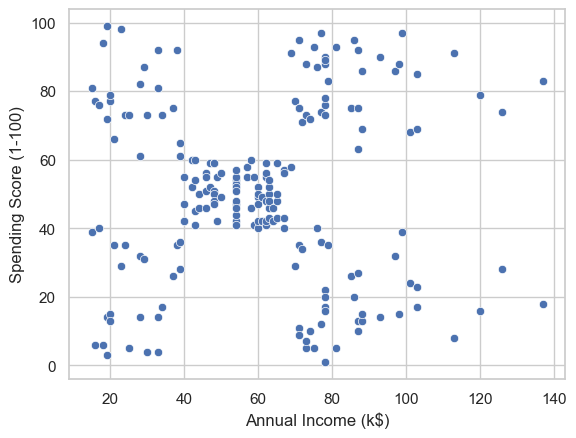

In [31]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data = data );

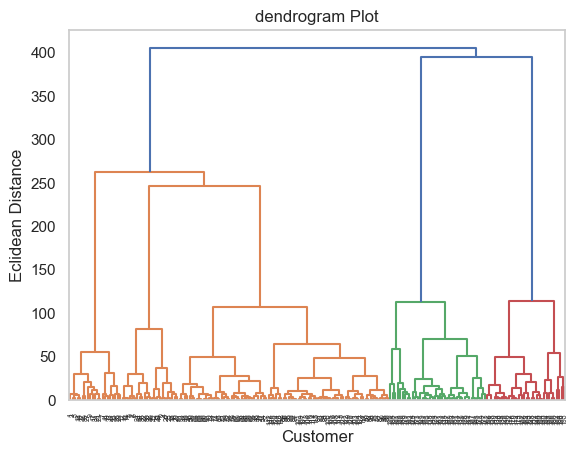

In [32]:
import scipy.cluster.hierarchy as shc
dendrogram = shc.dendrogram(shc.linkage(data,method="ward"))
plt.title("dendrogram Plot")
plt.xlabel("Customer")
plt.ylabel("Eclidean Distance")
plt.grid(False)


In [33]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
data["label"] = agc.fit_predict(data)
data


,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


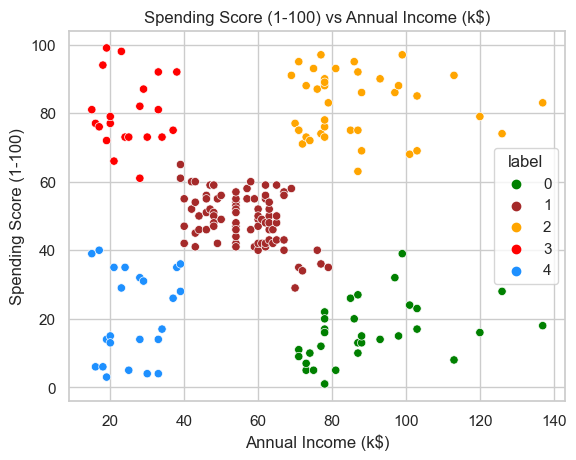

In [34]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','brown','orange','red','dodgerblue'],data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()
